# PROJECT 1 INTRO ML GROUP 248
##### 3. Data visualization(s) based on suitable visualization techniques in- cluding a principal component analysis (PCA)

In [2]:
import importlib_resources
import numpy as np
import xlrd
from scipy.linalg import svd

from matplotlib.pyplot  import figure, legend, plot, show, title, xlabel, ylabel, grid, subplot, scatter
from matplotlib.pyplot import *
import pandas as pd
import seaborn as sns

In [3]:
filename = "raw_data.csv"
df = pd.read_csv(filename, sep=";")
df.head()

,PLAYER,WIN,SP (seconds played),2PA,2P%,3PA,3P%,FTA,FT%,ORB,...,TOV,PF,PTS,+/-,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,DONCIC,1.0,2054.0,14.0,"0,714",11.0,"0,273",7.0,"0,571",1.0,...,4.0,1.0,33.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
1,DONCIC,1.0,2162.0,11.0,"0,636",14.0,"0,643",10.0,"0,800",1.0,...,0.0,1.0,49.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN
2,DONCIC,1.0,2400.0,10.0,"0,500",12.0,"0,500",10.0,"0,700",0.0,...,6.0,4.0,35.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN
3,DONCIC,1.0,2403.0,8.0,"0,500",8.0,"0,125",9.0,"0,778",0.0,...,6.0,2.0,18.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN
4,DONCIC,0.0,2296.0,13.0,"0,385",11.0,"0,545",7.0,"0,857",3.0,...,9.0,2.0,34.0,-4.0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Remove columns and rows with all NaN values
df_cleaned = df.dropna(axis=1, how='all')
df_cleaned = df_cleaned.dropna(axis=0, how='all')
# Display the cleaned DataFrame
df_cleaned.head()

,PLAYER,WIN,SP (seconds played),2PA,2P%,3PA,3P%,FTA,FT%,ORB,DRB,AST,STL,BLK,TOV,PF,PTS,+/-
0,DONCIC,1.0,2054.0,14.0,"0,714",11.0,"0,273",7.0,"0,571",1.0,12.0,10.0,2.0,0.0,4.0,1.0,33.0,4.0
1,DONCIC,1.0,2162.0,11.0,"0,636",14.0,"0,643",10.0,"0,800",1.0,9.0,7.0,0.0,0.0,0.0,1.0,49.0,9.0
2,DONCIC,1.0,2400.0,10.0,"0,500",12.0,"0,500",10.0,"0,700",0.0,12.0,12.0,1.0,1.0,6.0,4.0,35.0,6.0
3,DONCIC,1.0,2403.0,8.0,"0,500",8.0,"0,125",9.0,"0,778",0.0,7.0,10.0,2.0,1.0,6.0,2.0,18.0,11.0
4,DONCIC,0.0,2296.0,13.0,"0,385",11.0,"0,545",7.0,"0,857",3.0,7.0,8.0,0.0,1.0,9.0,2.0,34.0,-4.0


In [5]:
# Display the data types of the columns in the DataFrame
print(df_cleaned.dtypes)
# Identify columns with object data types that need conversion
columns_to_convert = ['2P%', '3P%', 'FT%']

# Ensure columns are strings, replace commas with dots, and convert to float
df_cleaned[columns_to_convert] = df_cleaned[columns_to_convert].astype(str).apply(lambda x: x.str.replace(',', '.').astype(float))

# Display the cleaned DataFrame
print(df_cleaned.dtypes)
print(df_cleaned.head())

PLAYER                  object
WIN                    float64
SP (seconds played)    float64
2PA                    float64
2P%                     object
3PA                    float64
3P%                     object
FTA                    float64
FT%                     object
ORB                    float64
DRB                    float64
AST                    float64
STL                    float64
BLK                    float64
TOV                    float64
PF                     float64
PTS                    float64
+/-                    float64
dtype: object
PLAYER                  object
WIN                    float64
SP (seconds played)    float64
2PA                    float64
2P%                    float64
3PA                    float64
3P%                    float64
FTA                    float64
FT%                    float64
ORB                    float64
DRB                    float64
AST                    float64
STL                    float64
BLK                    fl

In [6]:
features = df_cleaned.columns
X_complete = df_cleaned.values

# Remove the player names from the feature set
df_numeric =df_cleaned[features[1:]]
features_numeric = df_numeric.columns
X = df_numeric.values
N,M =  X.shape  #dimension of the problem


### Check data for visualization

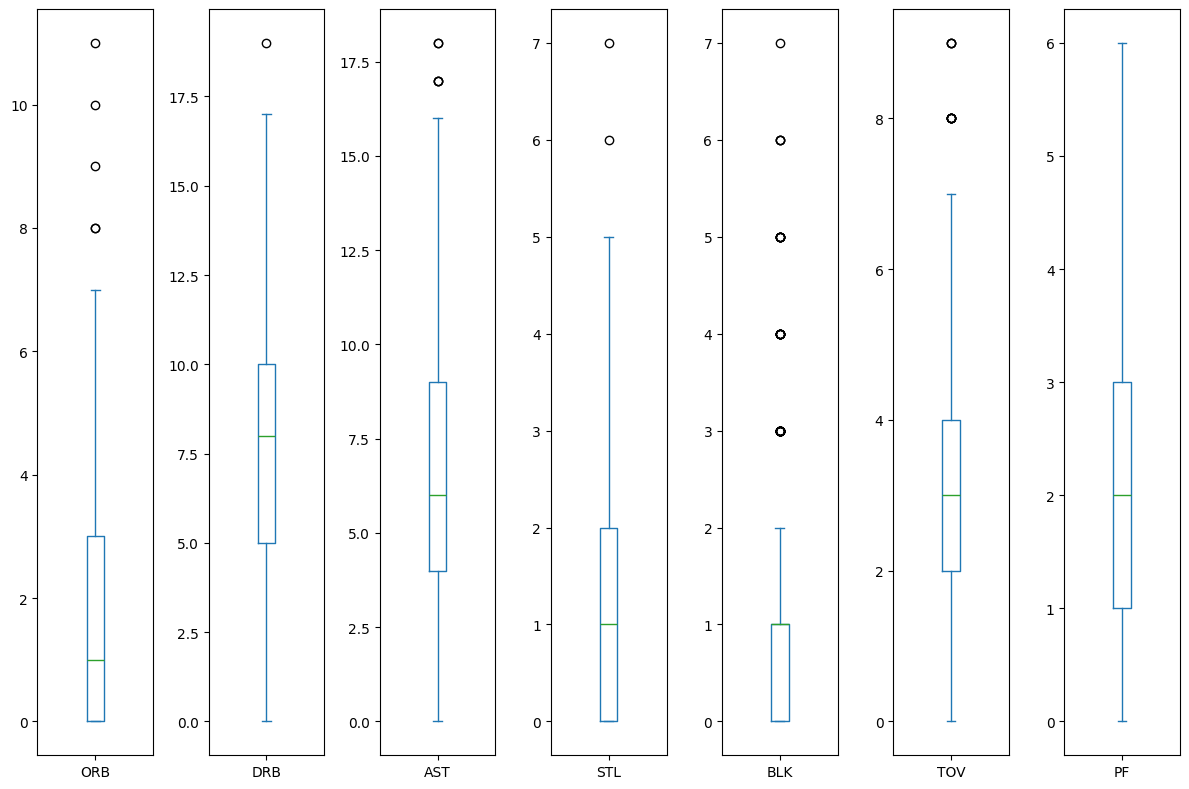

In [7]:
# Generate a boxplot for each feature in separate subplots
df_numeric[features_numeric[8:15]].plot(kind='box', subplots=True,  figsize=(12, 8), sharex=False, sharey=False)
# Set a tight layout to avoid overlap
tight_layout()
# Show the plots
show()

Boxplots are fine, they present some outliers but these are mainly there because of there is a little number of values that these datas capture (expecially for blocks, PF and turnovers) and the outliers are justified by a really bad/good game (that we want to keep track of in our analysis)

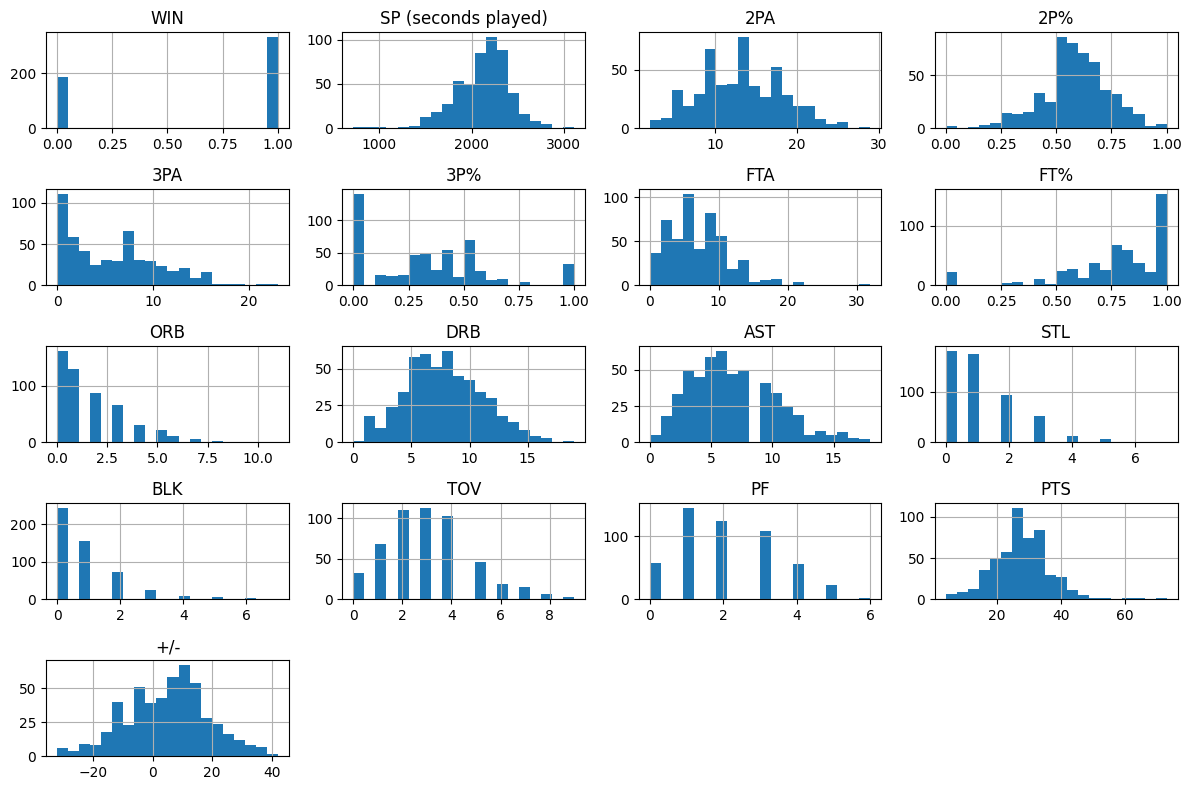

In [8]:
# Plot histograms for each feature to check for normal distribution
df_numeric.hist(bins=20, figsize=(12, 8))
tight_layout()
show()


Most of the attributes are mainly  normally distrubuted, the exceptions are these data that present less accurrance like bloks, steals, pf and of course win since it is a binary attribute


                          WIN  SP (seconds played)       2PA       2P%  \
WIN                  1.000000            -0.075751 -0.085379  0.145283   
SP (seconds played) -0.075751             1.000000  0.470169  0.012579   
2PA                 -0.085379             0.470169  1.000000  0.128452   
2P%                  0.145283             0.012579  0.128452  1.000000   
3PA                 -0.000153             0.134099 -0.399285 -0.220413   
3P%                  0.116283             0.013840 -0.126706 -0.053669   
FTA                  0.046237             0.314696  0.270419  0.085735   
FT%                  0.044225             0.126580 -0.037184 -0.061301   
ORB                 -0.036653             0.152101  0.494330  0.050501   
DRB                  0.100854             0.335025  0.363781  0.154339   
AST                  0.054348             0.219286  0.076166  0.101862   
STL                  0.029840             0.217848  0.202221  0.070394   
BLK                  0.027058         

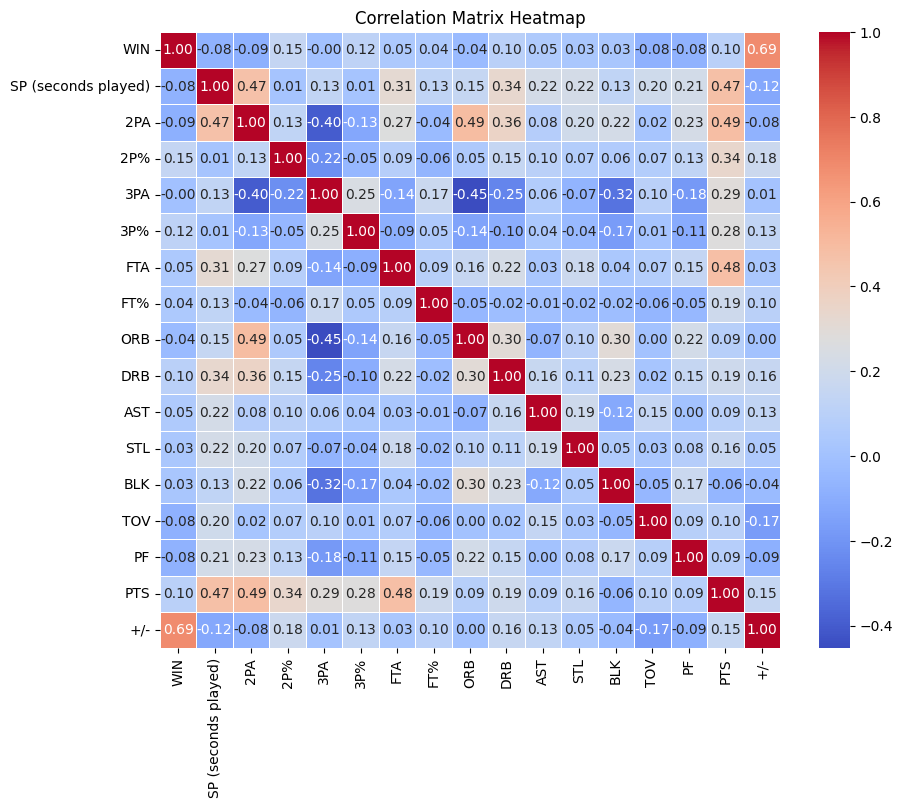

In [9]:
# Check correlation matrix
corr_matrix = pd.DataFrame(df_numeric, columns=features_numeric).corr()
print(corr_matrix)

# Create a heatmap
figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Display the heatmap
title('Correlation Matrix Heatmap')
show()

We can observe from the heatmap that the attributes are not strongly correlated
Low correlations in the dataset suggest that PCA will distribute the variance more evenly across the principal components. This means you might need more components to capture a significant portion of the total variance, making dimensionality reduction less effective compared to datasets with higher correlations.

Like I said above, since there's not high correlation I expect the data to distribute on a lot of different principal components, meaning that the classification aim seems difficult to pursue

In [ ]:

# ########## qua provo a togliere colonne perché sennò sgrava tutto mi sa
# columns_to_drop = ['PLAYER','WIN']
# df_dropped = df_cleaned.drop(columns=columns_to_drop)
# X = df_dropped.values
# df_dropped.head()

# features_dropped = df_dropped.columns

# # Check correlation matrix
# corr_matrix = pd.DataFrame(df_dropped, columns=features_dropped).corr()
# print(corr_matrix)

# corr_matrix = df_dropped.corr()


In [36]:
############# STANDARDIZE DATA ################
# Subtract mean value from data
Y = X - np.ones((N, 1)) * X.mean(axis=0) #########solo media
Y2 = Y * (1 / np.std(Y, 0))
# ###################### rescale data
# from sklearn.preprocessing import StandardScaler

# # Standardize the features before PCA
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)  # This scales each feature to mean 0 and variance 1
X_scaled = Y2

Since our attributes are distributed in very different scales, it is important to standardize them before PCa, by mean and variance

In [37]:

############# PCA by computing SVD of Y ################
U, S, V = svd(X_scaled, full_matrices=False)
# Compute variance explained by principal components
rho = (S * S) / (S * S).sum()
# Set a threshold for the cumulative variance
threshold = 0.90


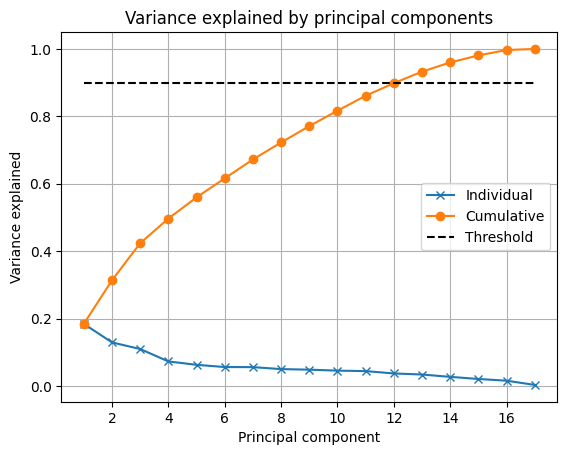

PCA completed using SVD on NBA player data.


In [13]:

############# PLOT VARIANCE EXPLAINED ################
figure()
plot(range(1, len(rho) + 1), rho, "x-")
plot(range(1, len(rho) + 1), np.cumsum(rho), "o-")
plot([1, len(rho)], [threshold, threshold], "k--")
title("Variance explained by principal components")
xlabel("Principal component")
ylabel("Variance explained")
legend(["Individual", "Cumulative", "Threshold"])
grid()
show()

print("PCA completed using SVD on NBA player data.")


From this graph we can see that out pca analysis is not really effective, we can explain more than 60% of the variance with 6 components, and we need 12 to reach the treshold. 

<Figure size 800x600 with 0 Axes>

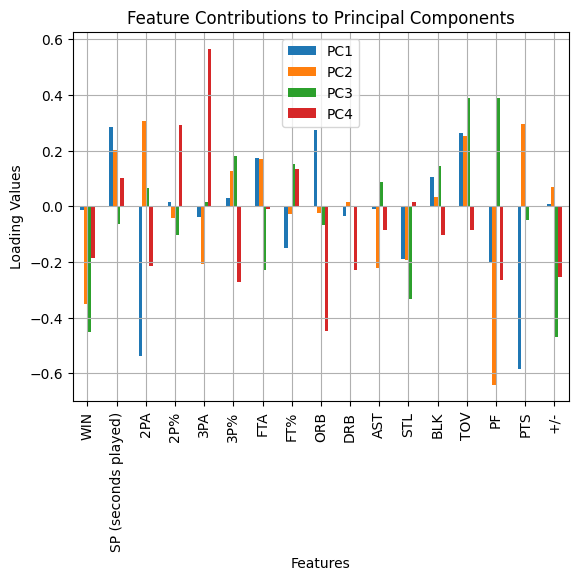

In [38]:

#Get the loadings (principal components)
loadings = V[:, :4]  # First two components

# Create a DataFrame for easy visualization
loadings_df = pd.DataFrame(loadings, index=features_numeric, columns=['PC1', 'PC2','PC3','PC4'])

# Visualize the loadings
figure(figsize=(8, 6))
loadings_df.plot(kind='bar')
title("Feature Contributions to Principal Components")
ylabel("Loading Values")
xlabel("Features")
# xticks(rotation=45)
grid(True)
show()

Here we can see that the directions of the principal component are spread into different attributes and not just a couple. This explains why we need that many components

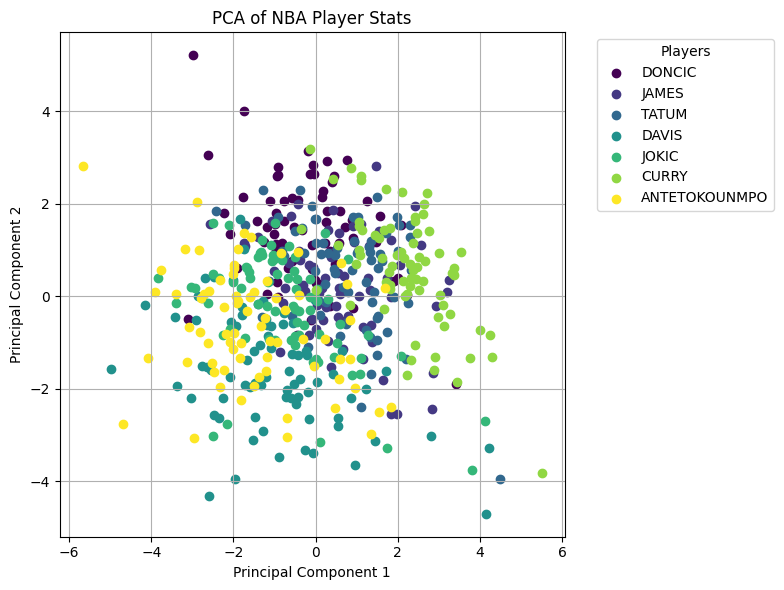

PCA completed, and scatter plot created with player coloring and legend.


In [44]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Compute principal components
Z = X_scaled @ V.T  # Project data onto principal components
players = df_cleaned.iloc[:, 0].str.strip() # Assuming the first column is the player names

############# SCATTER PLOT PCA RESULTS WITH PLAYER COLORING ################
# Use the first two principal components for the scatter plot
plt.figure(figsize=(8, 6))

# Get unique players and assign each a color
unique_players = players.unique()
colors = cm.viridis(np.linspace(0, 1, len(unique_players)))  # Generate a color for each player

# Plot each player with a corresponding color
for i, player in enumerate(unique_players):
    indices = players == player
    plt.scatter(Z[indices, 0], Z[indices, 1], color=colors[i], label=player)

# Adding labels and title
plt.title('PCA of NBA Player Stats')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)

# Adding the legend with player names
plt.legend(title="Players", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot with a tight layout
plt.tight_layout()
plt.show()

print("PCA completed, and scatter plot created with player coloring and legend.")


In [17]:
#### players encoding

# %% Extract the player names/IDs (assuming they are in the first column)
players = df_cleaned.iloc[:, 0]

# Convert player names/IDs to integer codes
player_codes = players.astype('category').cat.codes  # Convert player names to integer codes
K = player_codes.max() + 1  # Number of unique players

# %% Perform one-out-of-K encoding
# Create a zero matrix for encoding
player_encoding = np.zeros((player_codes.size, K))

# Set the appropriate positions to 1
player_encoding[np.arange(player_codes.size), player_codes] = 1

# %% The encoded matrix now contains the one-out-of-K encoding
print(f"Player Encoding Shape: {player_encoding.shape}")
print(player_encoding[:5])  # Display the first few rows of the encoded matrix


Player Encoding Shape: (517, 8)
[[0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]]
